<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Un valor W que representa la cantidad maxima de la mochila, dos arreglos, uno de valores de largo n $val = [a_1,a_2,...,a_n]$ y otro arreglo con el peso de n objetos $w = [w_1,w_2,...,w_n]$.

**Salida**: Un conjunto de objetos que maximizan el valor total.

KnapsackProblem/El problema de la mochila es un problema de optimizacion combinatoria esto quiere decir que busca la mejor solucion dentro de una cantidad de soluciones por medio de un problema donde debemos llenar una mochila incapaz de soportar mas del el peso declarado/permitido donde cada objeto tiene un valor y peso especifico.Dichos objetos deben optimizar el valor total sin que este exceda antes el peso permitido.

Este problema de optimizacion sera resuelto mediante programacion dinamica (bottom-up) y el algoritmo greddy/voraz.



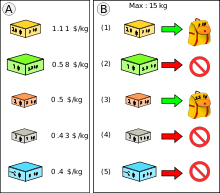

# 2. Descripcion del algoritmo

KnapsackProblem con programacion dinamica, es un metodo que sirve para reducir el tiempo de ejecucion de un algoritmo mediante el uso de subproblemas y subestructuras optimas. Este algoritmo es correcto de usar en este tipo de problema debido a que siempre resuelve los subproblemas pensando en obtener una solucion global/general del problema.

Para resolver este problema con programacion dinamica debe de seguir los siguiente pasos:

1. Primeramente debemos de crear una matriz $a$ la cual en su interior contendra en su totalidad valores "0".

2. Despues debemos hacer un recorrido en el primer ciclo de las filas y en el segundo de columnas.

3. Finalmente aplicamos la subestructura optima para encontrar un valor. Esto quiere decir que la subestructura nos ayuda a encontrar el valor maximo para cada una de los subproblemas posibles considerando la totalidad de elementos que podrian o no superar la capacidad maxima de la mochila.


KnapsackProblem con estrategia greddy/voraz es una estrategia de busqueda la cual consiste en elegir la opcion mas optima en cada paso local con la suerte de encontrar una solucion optima global. Esta estrategia resuelve de manera ineficiente el problema antes mencionado, debido a que como nombramos antes se enfoca en el subproblema actual y la mejor solucion para este, no teniendo en cuenta la busqueda para una solucion optima global dando asi una opcion aleatoria de encontrarla, habiendo casos donde directamente no es encontrada. 

Para resolver este problema con estrategia greddy/voraz debe de seguir los siguiente pasos:

1. Primeramente debemos de crear una variable $"a"$ que almacene un arreglo con los indices de todos los objetos.

2. Despues debemos de calcular el valor por kilo de cada item/objeto y guardarlo en un nuevo arreglo, para despues ordenar los indices dependiendo del el valor por kilo de menor a mayor.

3. Finalmente recorremos los indices de cada item/objeto y lo agregamos a la mochila.


# 2.2. Algoritmos para KnapsackProblem

A continuacion se mostrara la optimizacion de el problema KnapsackProblem tanto con progrmacion dinamica como con el uso de el algoritmo Greddy/Voraz.

In [54]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


In [56]:
def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = rd.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = rd.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [84]:
#Programacion Dinamica
cont2 = 0

def knapSack(W, wt, val, n, verbose = False):
  K = [[0 for x in range(W + 1)] for x in range(n + 1)]
  global cont2

  if verbose:
    print("Se inicializa una matriz k auxiliar")
    print("")

  for i in range(n + 1):
      for w in range(W + 1):
        cont2 += 1
        if verbose:
          print("1.Se verifica si la cantidad de objetos es 0 o si el peso maximo que puede almacenar es 0")
          print("En caso de ser asi la matriz ingresa un valor 0 dentro de sus valores")
          print("2.Se verifica si el peso actual del objeto es <= al peso maximo que puede almacenar")
          print("En caso de no cumplir ninguna de estas condiciones se le asigna a la matriz el valor anterior")
          print("")

          if i == 0 or w == 0:
              K[i][w] = 0
          elif wt[i-1] <= w:
            if verbose:
              print("Debido a que el peso actual del objeto es <= al peso maximo que puede almacenar")
              print("Se ingresa a la matriz el maximo valor entre el valor actual y el valor anterior ")
              print("Siendo el valor actual:",val[i-1] + K[i-1][w-wt[i-1]])
              print("Siendo el valor anterior",K[i-1][w])
              print("")
              K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
          
          else:
            if verbose:
              print("Debido a que el peso actual del objeto es mayor a lo maximo que puede almacenar")
              print("Se le asigna a la matriz el valor anterior")
              print("Siendo el valor anterior",K[i-1][w])
              print("")
            K[i][w] = K[i-1][w]

  if verbose: 
    print("Maximo valor almacenado:", K[n][W])

  return K[n][W]

val = [61, 139]
wt = [3, 7]
W = 5
n = len(val)

print("Valores de entrada")
print("Valores:", val)
print("Pesos de los objetos:", wt)
print("Peso maximo que puede almacenar:", W)
print("-----------------------------------------------------------")
aux = knapSack(W, wt, val, n, True)
print(aux)


Valores de entrada
Valores: [61, 139]
Pesos de los objetos: [3, 7]
Peso maximo que puede almacenar: 5
-----------------------------------------------------------
Se inicializa una matriz k auxiliar

1.Se verifica si la cantidad de objetos es 0 o si el peso maximo que puede almacenar es 0
En caso de ser asi la matriz ingresa un valor 0 dentro de sus valores
2.Se verifica si el peso actual del objeto es <= al peso maximo que puede almacenar
En caso de no cumplir ninguna de estas condiciones se le asigna a la matriz el valor anterior

1.Se verifica si la cantidad de objetos es 0 o si el peso maximo que puede almacenar es 0
En caso de ser asi la matriz ingresa un valor 0 dentro de sus valores
2.Se verifica si el peso actual del objeto es <= al peso maximo que puede almacenar
En caso de no cumplir ninguna de estas condiciones se le asigna a la matriz el valor anterior

1.Se verifica si la cantidad de objetos es 0 o si el peso maximo que puede almacenar es 0
En caso de ser asi la matriz ingr

In [74]:
#Estrategia Greddy/Voraz
cont = 0

def knapSackGreddy(W, wt, val, n, verbose = False):
  K = [0 for x in range(n)]
  l = [x for x in range(n)]
  global cont

  for i in range(0, n):
    K[i] = val[i]/wt[i]

  if verbose:
    print("Arreglo de peso:", K)
    print("Arreglo de indices cada objeto:", l)
    print("Se comparan los objetos ordenandolos en su totalidad")
    print("")

  for i in range (n):
    mayor = 0
    if verbose: 
      print("Se compara K[j] con la variable 'mayor' " )
      print("Objeto actual:", K[i])
      print("mayor:", mayor)

    for j in range(i, n):
      if K[j] > mayor:
        if verbose:
          print("Debido a que ", K[j], ">", mayor)
          print("mayor guarda el valor de K[j] y se intercambian las posiciones")

        mayor = K[j]
        K[j], K[i] = K[i], K[j]
        l[j], l[i] = l[i], l[j]

      else:
        if verbose:
          print("Debido a que ", K[j], "<", mayor)
          print("No se origina ningun cambio")
      
    if verbose:
      print("Maximo :", mayor)
      print("")

  if verbose:
    print("-----------------------------------------------------------")
    print("Arreglo de pesos ordenados:", K)
    print("Arreglo de indices cada objeto ordenados:", l)
    print("Se verifican si los obejtos caben en la mochila")
    print("-----------------------------------------------------------")

  maximo = 0
  if verbose:
    print("Se compara el objeto actual 'wt' y el peso maxima 'W'")
    print("Para encontrar el maximo valor")
  for i in l:
    cont += 1
    if wt[i] <= W:
      maximo += val[i]
      if verbose:
        print("Maximo valor almacenado:", maximo)
      W -= wt[i]
  if verbose:
    print("-----------------------------------------------------------")
    print("")

  return maximo

val = [53, 66, 81]
wt = [8, 9, 17]
W = 17

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)

print("Valores de entrada")
print("Valores:", val)
print("Pesos de los objetos:", wt)
print("Peso maximo que puede almacenar:", W)
print("-----------------------------------------------------------")
aux = knapSackGreddy(W, wt, val, n, True)
print("Maximo valor que puede ser almacenado dentro de la bolsa es:", aux)

Valores de entrada
Valores: [60, 100, 120]
Pesos de los objetos: [10, 20, 30]
Peso maximo que puede almacenar: 50
-----------------------------------------------------------
Arreglo de peso: [6.0, 5.0, 4.0]
Arreglo de indices cada objeto: [0, 1, 2]
Se comparan los objetos ordenandolos en su totalidad

Se compara K[j] con la variable 'mayor' 
Objeto actual: 6.0
mayor: 0
Debido a que  6.0 > 0
mayor guarda el valor de K[j] y se intercambian las posiciones
Debido a que  5.0 < 6.0
No se origina ningun cambio
Debido a que  4.0 < 6.0
No se origina ningun cambio
Maximo : 6.0

Se compara K[j] con la variable 'mayor' 
Objeto actual: 5.0
mayor: 0
Debido a que  5.0 > 0
mayor guarda el valor de K[j] y se intercambian las posiciones
Debido a que  4.0 < 5.0
No se origina ningun cambio
Maximo : 5.0

Se compara K[j] con la variable 'mayor' 
Objeto actual: 4.0
mayor: 0
Debido a que  4.0 > 0
mayor guarda el valor de K[j] y se intercambian las posiciones
Maximo : 4.0

-------------------------------------

#3. Tiempo de ejecución

##3.1. Algoritmo Dinámico.

###Teorema (Tiempo de ejecución).

El tiempo de ejecución del algoritmo dinámico es de $O(n * W)$.

###Prueba del Teorema

Siendo $n$ la cantidad de objetos de entrada y $W$ la capacidad de peso máximo que puede almacenar nuestra mochila, el algoritmo necesitará generar una matriz de $n * W$ quedando una complejidad espacial de $O(n * W)$ y a la vez obtendremos exactamente la misma complejidad temporal por la creación de la matriz.

Luego nuestro código irá recorriendo toda la matriz con ayuda de dos ciclos los cuales irán desde $0$ hasta $n$ y el segundo ciclo anidado irá desde $0$ hasta $W$, esto provocará que nuestra función quede definida del siguiente modo:

$T(n) = 2 * O(n * W)$

Esto provoca que nuestra función $T(n)$ tenga una copmlejidad temporal correspondiente a $O(n * W)$.

##3.2. Algoritmo de greedy.

###Teorema (Tiempo de ejecución).

El tiempo de ejecución de este algoritmo es de $O(n*log(n))$

###Prueba del Teorema

Para calcular el tiempo de ejecución de este algoritmo primero definiermos una función $T(n)$ la cual contendrá todos los procesos realizados por nuestro algoritmo.

En este caso nuestra función quedaría definida de la siguiente manera:

$T(n) = O(n * log(n)) + O(n)$

donde $O(n * log(n))$ corresponde al tiempo de ejecución de la función de ordenamiento y $O(n)$ corresponde al tiempo de ejecución del ciclo que se encarga de buscar la cantidad máxima de objetos que pueden entrar en la mochila.
Por lo tanto teniendo en cuenta estos factores pordemos considerar que la complejidad temporal de nuestro algoritmo de greedy en su caso promedio es de $O(n * log(n))$.

Para añadir se debe considerar que el caso promedio de este algoritmo corresponde netamente al tiempo de ejecución del metodo de ordenamiento, por lo tanto si es que se logra tocar el peor caso de este, la complejidad temporal del algorimo aumenta a $O(n^2)$.

#4. Correctitud

## **Teorema (Correctitud).**

El Algoritmo genera una matriz en la cual se irán almacenando los valores optimos de cada subproblema, al final de la ejecución retorna el valor máximo del problema original.

### Prueba del Teorema

**Inicializacion**

Antes de la primera iteracion inicializamos una matriz $K$ con 0 en todos sus espacios. Esto quiere decir que al ingresar en la posicion $K[i][w]$ siendo w el peso del objeto, tendra como valor la maxima ganancia encontrada por lo que cumple la propiedad.

**Mantencion**

Al comienzo de cada i-ésima iteracién el elemento $K(i,w)$ , siempre almacenará la cantidad máxima de ganancia posible para el subproblema resuelto en ese momento. 

Durante esta i-ésima iteración tenemos dos casos posibles:

1. Si $wt[i - 1] <= w$ siendo "$wt$" el arreglo de pesos, $K[i][w]$ contendrá en su interior el máximo resultado entre $val[i - 1] + K[i - 1][w -wt[i - 1]]$ siendo val el arreglo de valores.

2. Caso contrario donde $wt[i - 1] > w$, $K[i][w]$ contendrá en su interior el máximo resultado, esto quiere decir $K[i - 1][w]$.

Dado que en cada caso la posicion anteriormente vista almacena siempre la maxima ganancia hemos  comprobado que la propiedad es verdadera.

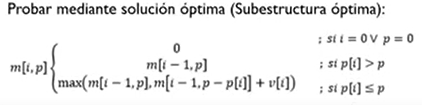

###**Por qué el algoritmo greedy no retorna el resultado óptimo?**

El algoritmo de greedy o voraz no retorna el resultado óptimo ya que solo considera los objetos que logren optimizar de la mejor manera posible el valor máximo buscado, para esto nuestro código necesita conseguir la proporción entre los valores y pesos, una vez hecho esto el algoritmo considerará unicamente los objetos que consigan mejor ratio de valores/pesos, esto provocará que no se verifiquen todos los posibles casos y el algoritmo no logre conseguir un resultado óptimo global, solo local.

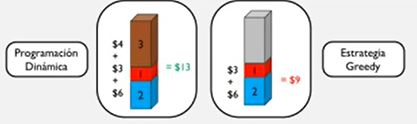

#5. Experimentos

##5.1. Algoritmo de greedy vs dinámico

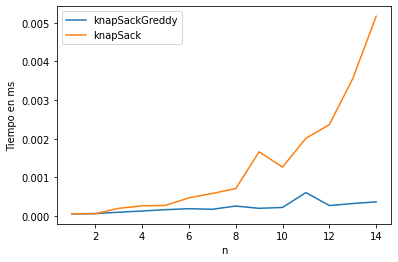

In [97]:
x=[]
y_Dynamic = []
y_Greedy = []

for n in range(1,15):
  W, val, wt = knapsack_instance_generator(n)
  cont = 0
  cont2 = 0
  #la función repeat está ejecutando 20 veces corteDeVarillaDinamico con el arreglo b y retorna el mejor tiempo obtenido.
  t_Dynamic = repeat(setup="from __main__ import knapSack", stmt=f"knapSack({W}, {wt}, {val}, {n})", repeat=1, number=10)
  #la función repeat está ejecutando 20 veces corteDeVarillaRecursivo con el arreglo a y retorna el mejor tiempo obtenido.
  t_Greedy = repeat(setup="from __main__ import knapSackGreddy", stmt=f"knapSackGreddy({W}, {wt}, {val}, {n})", repeat=1, number=10)

  x.append(n)
  y_Dynamic.append(t_Dynamic)
  y_Greedy.append(t_Greedy)

plt.plot(x,y_Greedy)
plt.plot(x,y_Dynamic)
plt.legend(["knapSackGreddy","knapSack"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

Como se puede apreciar en el grafico anterior, el tiempo de ejecución del algoritmo dinámico es mayor que el del algortimo de greedy, esto ocurre ya que la complejidad temporal del código dinámico es $O(n*W)$ y como este depende del peso máximo la complejidad temporal se puede disparar o puede disminuir en gran medida, en cambio el algoritmo de Greedy consigue un tiempo de ejecución mucho menor por el hecho de que depende únicamente de la cantidad de objetos que se desea optimizar con una complejidad de $O(n*log(n))$, el problema de este algoritmo es que no siempre conseguirá la solución optima ya que no verifica todos los posibles casos como si lo realiza el código dinámico.

##5.1. Cantidad de SubProblemas resueltos

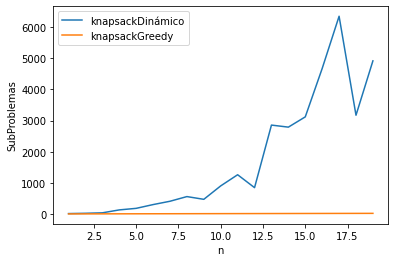

In [98]:
y_Dynamic = []
y_Greedy = []
x = []

for n in range(1,20):
    W, val, wt = knapsack_instance_generator(n)
    cont = 0
    cont2 = 0
    valor1= knapSack(W, wt, val, n)
    valor2= knapSackGreddy(W, wt, val, n)

    y_Dynamic.append(cont2)
    y_Greedy.append(cont)
    x.append(n)

plt.plot(x, y_Dynamic)
plt.plot(x, y_Greedy)
plt.legend(["knapsackDinámico", "knapsackGreedy"])

plt.xlabel("n")
plt.ylabel("SubProblemas")
plt.show()

Como se puede apreciar en el gráfico anterior, la cantidad de sub-problemas resueltos por el algoritmo dinámico sigue siendo mayor al algoritmo de greedy, esto sigue ocurriendo por la misma razón explicada en el experimento anterior y en la correctitud.

0
0
0
0
0


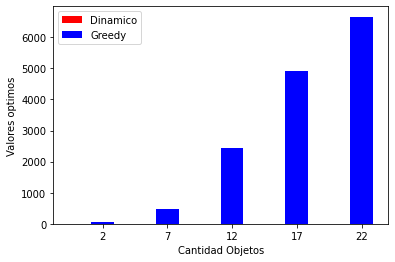

In [93]:
y_Dynamic = []
y_Greedy = []
x = []

for n in range(2, 25, 5):
    W, val, wt = knapsack_instance_generator(n)
    valor1 = knapSack(W, wt, val, n)
    print(valor1)
    valor2 = knapSackGreddy(W, wt, val, n)

    y_Dynamic.append(valor1)
    y_Greedy.append(valor2)
    x.append(n)
    
indices = np.arange(len(x))
anchoBarra = 0.35

plt.xlabel("Cantidad Objetos")
plt.ylabel("Valores optimos")

plt.bar(indices, y_Dynamic, anchoBarra, color= "red", label= "Dinamico")
plt.bar(indices + anchoBarra, y_Greedy, anchoBarra, color= "blue", label= "Greedy")

plt.xticks(indices + anchoBarra, x)
plt.legend()
plt.show()



Como se puede apreciar en el gráfico anterior, los valores obtenidos por la función dinámica son mayores a los valores conseguidos por el algoritmo de greedy ya que este último no logra optimizar de la mejor manera el valor total,
a pesar de todo hay casos en donde el algoritmo de Greedy logra obtener valores muy cercano o iguales al código dinámico pero esto ocurre muy pocas veces.